(chapter4_part2)=

# Regularization

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 


## 1. Required Libraries & Data

In [1]:
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # sharper plots

# Defined data
X_train = [30, 46, 60, 65, 77, 95]
y_train = [31, 30, 80, 49, 70, 118]

X_test = [17, 40, 55, 57, 70, 85]
y_test = [19, 50, 60, 32, 90, 110]

## 2. Ridge Regression

In [2]:
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale

#Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. The default value is 1.0 or a full penalty.

degree_=4
lambda_=0.5

# scale the X data to prevent numerical errors.
X_train = np.array(X_train).reshape(-1, 1)

polyX = PolynomialFeatures(degree=degree_).fit_transform(X_train)

model1 = LinearRegression().fit(polyX, y_train)
model2 = Ridge(alpha=lambda_).fit(polyX, y_train)

# print("OLS Coefs: " + str(model1.coef_[0]))
# print("Ridge Coefs: " + str(model2.coef_[0]))

print(f"Linear Coefs: {sum(model1.coef_)}")
print(f"Ridge Coefs: {sum(model2.coef_)}")


Linear Coefs: -64.66185222664129
Ridge Coefs: -7.221838297484756


/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10221e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


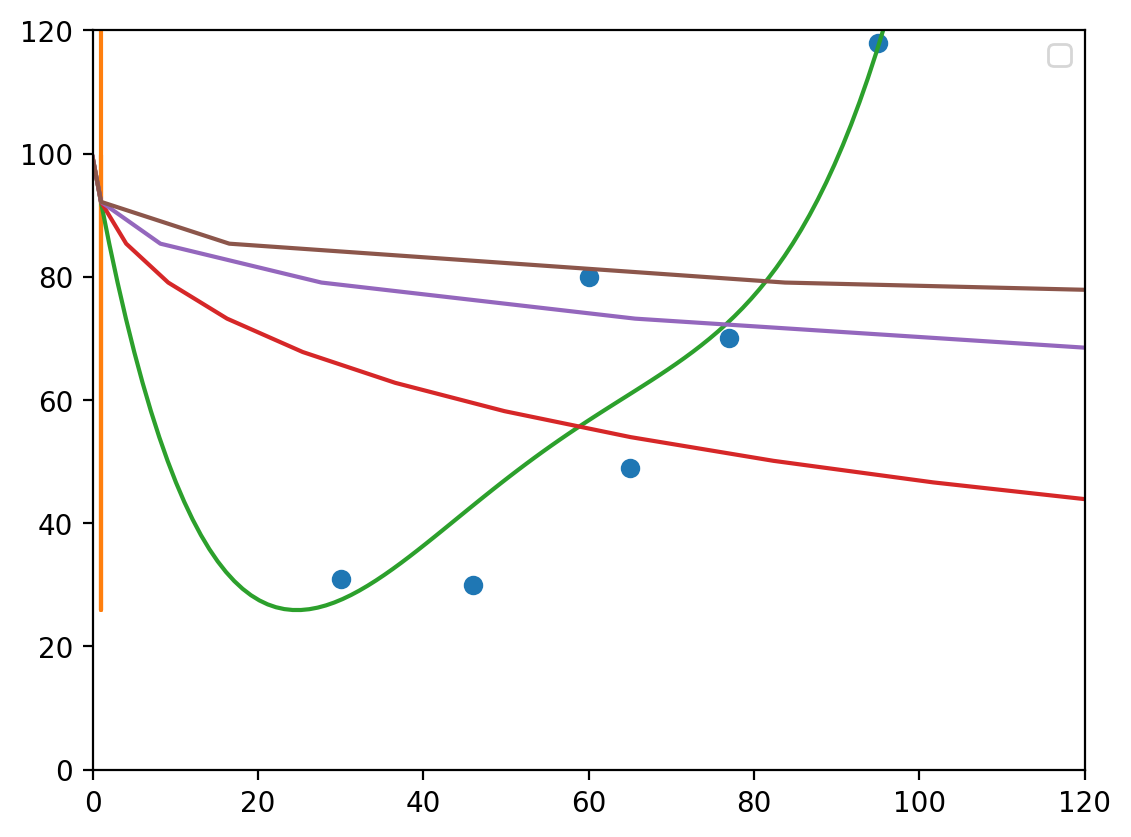

In [3]:
t_ = np.array(np.linspace(0, 120, 120)).reshape(-1, 1)
t = PolynomialFeatures(degree=degree_).fit_transform(t_)



# visualize
plt.plot(X_train, y_train, 'o', t, model2.predict(t), '-')
# plt.scatter(X_train, y_train, color='blue', label='Training set')
# plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,120))
plt.xlim((0,120))
plt.show()

## 3. Lasso Regression

In [4]:
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale

#Confusingly, the lambda term can be configured via the “alpha” argument when defining the class. The default value is 1.0 or a full penalty.

degree_=4
lambda_=0


# scale the X data to prevent numerical errors.
X_train = np.array(X_train).reshape(-1, 1)
# y_train = np.array(y_train).reshape(-1, 1)

polyX = PolynomialFeatures(degree=degree_).fit_transform(X_train)

model1 = LinearRegression().fit(polyX, y_train)
model2 = Lasso(alpha=lambda_, max_iter=1300000).fit(polyX, y_train)

print(f"Linear Coefs: {model1.coef_}")
print(f"Lasso Coefs: {model2.coef_}")


/var/folders/5y/7zvhsc3x5nx162713kvx9c1m0000gn/T/ipykernel_55001/4278195487.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model2 = Lasso(alpha=lambda_, max_iter=1300000).fit(polyX, y_train)
/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Linear Coefs: [ 0.00000000e+00 -6.64626506e+01  1.82147242e+00 -2.07589752e-02
  8.48966900e-05]
Lasso Coefs: [ 0.00000000e+00 -5.77567467e+01  1.58872837e+00 -1.81456434e-02
  7.44216108e-05]


/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.281e+02, tolerance: 5.672e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [5]:
sum(model2.coef_)

-56.186089506337865

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


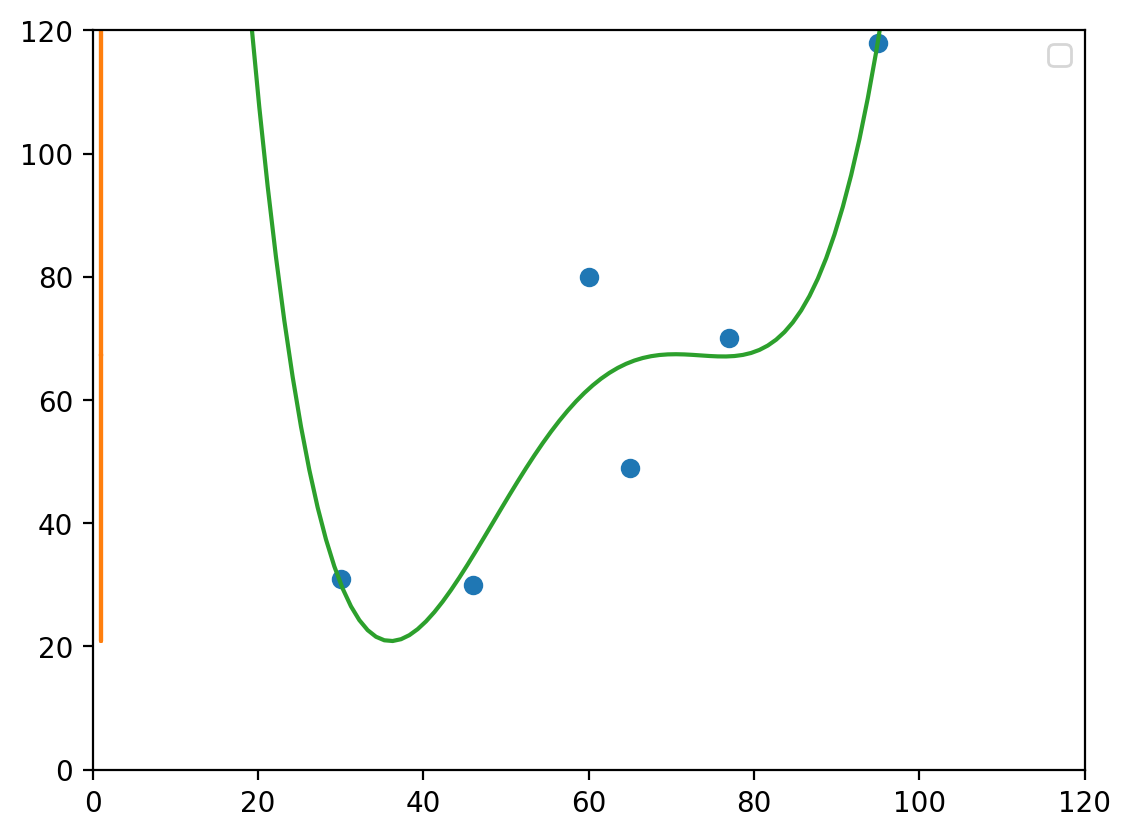

In [6]:
t_ = np.array(np.linspace(0, 120, 120)).reshape(-1, 1)
t = PolynomialFeatures(degree=degree_).fit_transform(t_)



# visualize
plt.plot(X_train, y_train, 'o', t, model2.predict(t), '-')
# plt.scatter(X_train, y_train, color='blue', label='Training set')
# plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,120))
plt.xlim((0,120))
plt.show()